In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import wrangle

___
## Call the data sets

In [13]:
air = wrangle.clean_air()
air

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,time,hour,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,Pm_25_24hr,AQI_pm_25_24hr,Pm_10_24hr,AQI_pm10_24hr
0,2021-05-20 00:01:27,8,6,8,0,0.00,0,0,None,2021-05-20,00:01:27,0,3,Good,0.141204,Good,6.704282,Good,8.568287,Good
1,2021-05-20 00:04:27,8,6,8,0,0.00,0,0,None,2021-05-20,00:04:27,0,3,Good,0.141204,Good,6.704282,Good,8.568287,Good
2,2021-05-20 00:07:27,8,6,8,0,0.00,0,0,None,2021-05-20,00:07:27,0,3,Good,0.141204,Good,6.704282,Good,8.568287,Good
3,2021-05-20 00:10:27,8,6,8,0,0.00,0,0,None,2021-05-20,00:10:27,0,3,Good,0.141204,Good,6.704282,Good,8.568287,Good
4,2021-05-20 00:13:27,8,6,8,0,0.00,0,0,None,2021-05-20,00:13:27,0,3,Good,0.141204,Good,6.704282,Good,8.568287,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106282,2021-07-08 23:35:00,0,0,0,0,29.13,0,8,None,2021-07-08,23:35:00,23,3,Good,0.023188,Good,3.906087,Good,4.773333,Good
106283,2021-07-08 23:40:00,0,0,0,0,29.13,0,8,None,2021-07-08,23:40:00,23,3,Good,0.023188,Good,3.906087,Good,4.773333,Good
106284,2021-07-08 23:45:00,0,0,0,0,29.13,0,8,None,2021-07-08,23:45:00,23,3,Good,0.023188,Good,3.906087,Good,4.773333,Good
106285,2021-07-08 23:50:00,0,0,0,0,29.13,0,8,None,2021-07-08,23:50:00,23,3,Good,0.023188,Good,3.906087,Good,4.773333,Good


In [3]:
air = air.replace(to_replace=-999, value=0)

More info on air quality (idea is to make a level of air quality)
- https://forum.airnowtech.org/t/the-aqi-equation/169
- https://forum.airnowtech.org/t/aqi-calculations-overview-ozone-pm2-5-and-pm10/168
- https://www.airnow.gov/aqi/aqi-basics/
- https://fit.thequint.com/health-news/explaining-air-quality-index#read-more
- https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf
- https://www.epa.gov/sites/production/files/2014-05/documents/zell-aqi.pdf
- 

In [4]:
#air['dates'] = pd.to_datetime(air['datetime']).dt.date
#air['time'] = pd.to_datetime(air['datetime']).dt.time
#air['hour'] = pd.to_datetime(air['datetime']).dt.hour
#air['weekday'] = pd.to_datetime(air['datetime']).dt.weekday

In [5]:
#pm_25_24hr = air.groupby('dates', as_index=False)['Pm2_5'].mean()
#pm_25_24hr.sample()

In [6]:
#pm_25_24hr= pm_25_24hr.rename(columns={'Pm2_5':'Pm_25_24hr'})
#pm_25_24hr.sample()

In [7]:
#air = air.merge(pm_25_24hr, on = 'dates', how ='left')
#air.sample()

In [8]:
#air['AQI_pm_25_24hr'] = pd.cut(air.CO, 
                            #bins = [-1,12.1,35.5,55.5,150.5,250.5,4000],
                            #labels = ['Good', 'Moderate', 
                                      #'Unhealthy for Sensitive Groups', "Unhealthy", 
                                      #"Very Unhealthy", 'Hazardous'])
#air.sample()

In [9]:
air

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,time,hour,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,Pm_25_24hr,AQI_pm_25_24hr,Pm_10_24hr,AQI_pm10_24hr
0,2021-05-20 00:01:27,8,6,8,0,0.00,0,0,None,2021-05-20,00:01:27,0,3,Good,0.141204,Good,6.704282,Good,8.568287,Good
1,2021-05-20 00:04:27,8,6,8,0,0.00,0,0,None,2021-05-20,00:04:27,0,3,Good,0.141204,Good,6.704282,Good,8.568287,Good
2,2021-05-20 00:07:27,8,6,8,0,0.00,0,0,None,2021-05-20,00:07:27,0,3,Good,0.141204,Good,6.704282,Good,8.568287,Good
3,2021-05-20 00:10:27,8,6,8,0,0.00,0,0,None,2021-05-20,00:10:27,0,3,Good,0.141204,Good,6.704282,Good,8.568287,Good
4,2021-05-20 00:13:27,8,6,8,0,0.00,0,0,None,2021-05-20,00:13:27,0,3,Good,0.141204,Good,6.704282,Good,8.568287,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106282,2021-07-08 23:35:00,0,0,0,0,29.13,0,8,None,2021-07-08,23:35:00,23,3,Good,0.023188,Good,3.906087,Good,4.773333,Good
106283,2021-07-08 23:40:00,0,0,0,0,29.13,0,8,None,2021-07-08,23:40:00,23,3,Good,0.023188,Good,3.906087,Good,4.773333,Good
106284,2021-07-08 23:45:00,0,0,0,0,29.13,0,8,None,2021-07-08,23:45:00,23,3,Good,0.023188,Good,3.906087,Good,4.773333,Good
106285,2021-07-08 23:50:00,0,0,0,0,29.13,0,8,None,2021-07-08,23:50:00,23,3,Good,0.023188,Good,3.906087,Good,4.773333,Good


In [10]:
#df = air[air.CO == -999]
#df

In [11]:
air_train, air_validate, air_test = wrangle.split_data(air)

In [12]:
flood = wrangle.clean_flood()
flood.head(1)

AttributeError: module 'wrangle' has no attribute 'clean_flood'

In [ ]:
flood_train, flood_validate, flood_test = wrangle.split_data(flood)

In [ ]:
weather = wrangle.wrangle_weather()
weather.head(1)

In [ ]:
weather_train, weather_validate, weather_test = wrangle.split_data(weather)

In [ ]:
sound = wrangle.wrangle_sound()
sound.head(1)

In [ ]:
sound['noise_level'] = pd.cut(sound.NoiseLevel_db, 
                                bins = [-1,46,66,81,101,4000],
                                labels = ['Normal', 'Moderate', 
                                          'Loud', "Very Loud", 
                                          "Extremely Loud"])
sound.head(1)

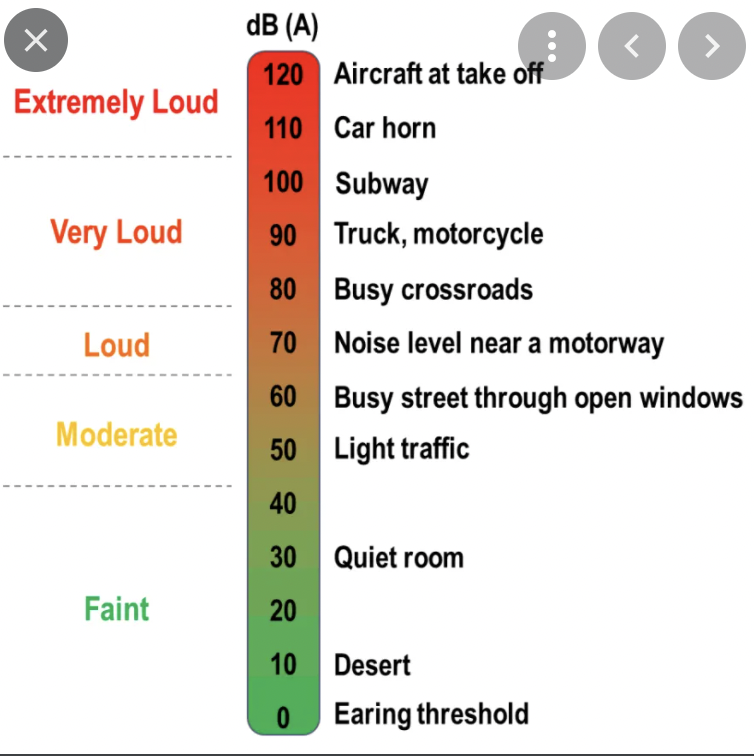

In [ ]:
sound_train, sound_validate, sound_test = wrangle.split_data(sound)

In [ ]:
saws = wrangle.wrangle_saws()
saws.head(1)

In [ ]:
saws_train, saws_validate, saws_test = wrangle.split_data(saws)

___
# Explore Air Quality

### Questions we asked about air quality
- Are there spikes in air quality at certain times or days?
- Is air quality and water consumption worse on the weekends?
- How is the air quality after it floods?
- What type of weather has the best air quality?
- As air quality gets worse water consumption goes up.
- Does air quality influence water consumption?

In [ ]:
air.head(1)


## Univariate Exploration

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm1_0')
plt.title('Count of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm1_0')
plot.set(xlim=(0.5, 65))
plot.set(ylim=(0, 2100))
plt.xticks(rotation=45)
plt.title('Count of Particles < than 1 Micron Minus 0')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm1_0')
plot.set(xlim=(19.5, 65))
plot.set(ylim=(0, 400))
plt.xticks(rotation=45)
plt.title('Count of Larger Quantities of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
air.Pm1_0.value_counts()

### Takeaways:
- Top 5 readings are at 0, 3, 6, 10, and 8
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes at 50, 43, and 53
    - keep in mind these are only being considered "spikes" when also looking at the surrounding reading totals.
___

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm2_5')
plt.xticks(rotation=45)
plt.title('Count of Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='Pm2_5')
plot.set(xlim=(19.5, 76))
plot.set(ylim=(0, 400))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
air.Pm2_5.value_counts()

### Takeaways:
- Top 5 readings are at 5, 4, 6, 3, and 8
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes at 21,29, 37, and 49
    - keep in mind these are only being considered "spikes" when also looking at the surrounding reading totals.

___

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm10')
plt.title('Count Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm10')
plot.set(xlim=(0.5, 85))
plot.set(ylim=(0, 1100))
plt.xticks(rotation=45)
plt.title('Count Quantities of Particles < than 2.5 Micron (Minus 0)')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
plt.figure(figsize=(30,14))
plot = sns.countplot(data=air, x='Pm10')
plot.set(xlim=(19.5, 85))
plot.set(ylim=(0, 300))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
air.Pm10.value_counts()

### Takeaways:
- Top 5 readings are at 0, 4, 5, 9, and 6
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes at 29, 35, 39, and 56
    - keep in mind these are only being considered "spikes" when also looking at the surrounding reading totals.
___

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='SO2')
plt.title('Sulfuric Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='SO2')
plot.set(xlim=(0.5, 4.5))
plot.set(ylim=(0, 6))
plt.title('Sulfuric Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
air.SO2.value_counts()

### Takeaways:
- There are barley and readings outside of no reading for SO2

___

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='O3')
plt.title('Ozone concentration Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

In [ ]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='O3')
plot.set(xlim=(0.5, 72))
plot.set(ylim=(0, 300))
plt.xticks(rotation=45)
plt.title('Ozone concentration Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
air.O3.value_counts()

### Takeaways:
- Top 5 readings are at 0, 32, 36, 26, and 23
- There is no obvious trends
- There are large spikes throughout all levels of concentration.
___ 

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='CO')
plt.title('Carbone Monoxide  Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

In [ ]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='CO')
plot.set(xlim=(0.5, 10.5))
plot.set(ylim=(0, 2100))
plt.title('Carbone Monoxide  Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
air.CO.value_counts()

### Takeaways:
- The higher the concentration the lower the amount of times it has been recorded.
- spike at 63
    - concentration of 63 was read 21 times but everything after 4 has only been picked up 1 time each.

___

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='NO2')
plt.title('Nitrogen Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

In [ ]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='NO2')
plot.set(xlim=(0.5, 19.5))
plot.set(ylim=(0, 4400))
plt.title('Nitrogen Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [ ]:
air.NO2.value_counts()

### Takeaways:
- Top 5 readings are at 0, 1, 7, 8, and 6
- Barely and readings between 2-5 and 13-19

___

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='alert_triggered')
plt.title('Measurements that Triggered an Alert.')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

In [ ]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='alert_triggered')
plot.set(xlim=(0.5, 6.5))
plot.set(ylim=(0, 7000))
plt.title('Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

In [ ]:
air.alert_triggered.value_counts()

### Takeaways:
- Nitrogen Dioxide mostly contributes to being a trigger.
___

## Bivariate

### Questions we asked about air quality
- Are there spikes in air quality at certain times or days?
- Is air quality and water consumption worse on the weekends?
- How is the air quality after it floods?
- What type of weather has the best air quality?
- As air quality gets worse water consumption goes up.
- Does air quality influence water consumption?

In [ ]:
air_train.head(1)

In [ ]:
plt.subplots(2, 2, figsize=(17,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,2,1)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rainbow')
plot.set(xlim=(-1, 20.5))
plot.set(ylim=(0, 600))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(2,2,2)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rainbow')
plot.set(xlim=(20.5, 40.5))
plot.set(ylim=(0, 100))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(2,2,3)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rainbow')
plot.set(xlim=(40.5, 60.5))
plot.set(ylim=(0, 10))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(2,2,4)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rainbow')
plot.set(xlim=(60.5, 80.5))
plot.set(ylim=(0, 5))
plt.title('Sales Amount by Weekday', size=20, color='black')

In [ ]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='NO2', edgecolor='black')
plot.set(xlim=(0.5, 1.5))
plot.set(ylim=(0, 2500))
plt.title('NO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

In [ ]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='Pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 30))
plt.title('NO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=5,handleheight=2.4, labelspacing=0.05)


In [ ]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='SO2', palette='magma',edgecolor='black')
plot.set(xlim=(2.5, 3.5))
plot.set(ylim=(0, 10))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=5,handleheight=2.4, labelspacing=0.05)


In [ ]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='Pm10', palette='magma',edgecolor='black')
plot.set(xlim=(3.5, 4.5))
plot.set(ylim=(0, 5))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=7,handleheight=2.4, labelspacing=0.05)


In [ ]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='O3', palette='magma',edgecolor='black')
plot.set(xlim=(4.5, 5.5))
plot.set(ylim=(0, 5))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=7,handleheight=2.4, labelspacing=0.05)


In [ ]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='CO', palette='magma',edgecolor='black')
plot.set(xlim=(5.5, 6.5))
plot.set(ylim=(0, 15))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [ ]:
air_train

In [ ]:
plt.figure(figsize=(16,8))
plot = air_train.groupby('weekday').mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
plot.set(title='Average Temperature by Month', xlabel='Day of the Week', ylabel='Average')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [ ]:
air.head(1)